<a href="https://colab.research.google.com/github/virtuel75/avila-analysis/blob/main/notebook/avila_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recuperation des données

In [ ]:
!pip install wget

In [2]:
from os import path
import wget

In [3]:
data_file = 'avila.zip'

## Téléchargement des données

In [4]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00459/avila.zip'

if not path.exists(data_file):
  wget.download(url=data_url, out=data_file)

## Extraction des données

In [5]:
from zipfile import ZipFile

In [6]:
# train file
avila_tr_filename = './avila/avila-tr.txt'

# test file
avila_ts_filename = './avila/avila-ts.txt'

In [7]:
if not path.exists(avila_tr_filename) or not path.exists(avila_ts_filename):
  with ZipFile(data_file, 'r') as zip_ref:
      zip_ref.extractall()

# Lecture

In [8]:
import pandas as pd

In [9]:
data_tr = pd.read_csv(avila_tr_filename, '\n', ',', header=None)
data_ts = pd.read_csv(avila_ts_filename, '\n', ',', header=None)

In [10]:
data_tr.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
8890,0.068573,0.226939,0.015130,-0.609818,-1.078955,0.397939,0.069175,-0.364040,0.344717,0.445655,A
10131,0.080916,0.164129,0.192950,0.819007,0.261718,1.228436,0.824183,0.169690,-0.247731,0.746611,A
9582,-0.128929,0.289748,0.235627,1.057473,0.172340,-0.474083,0.220177,1.347371,0.407080,-0.441313,E
9883,-0.128929,-0.283388,0.488131,0.833628,0.797987,-0.474083,-1.138838,0.137868,0.438262,0.398145,Y
8877,0.192011,-0.032150,0.452567,-0.877078,0.261718,0.397939,0.144676,-0.304745,0.001721,0.394228,A


In [11]:
data_ts.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
5508,-0.252367,0.062064,0.171611,-0.420108,0.261718,-1.138481,-0.308329,0.364562,0.718895,-0.772142,E
8417,0.154980,-0.275537,0.417003,0.813815,0.261718,-0.640182,0.257927,0.526409,-0.091823,-0.594595,A
4078,0.154980,0.234790,0.210732,0.643738,0.172340,0.148790,-0.157328,0.353068,-0.216549,0.355542,A
9395,0.154980,-0.448263,0.356544,-0.003837,0.261718,0.937762,-0.157328,-0.776326,-0.310094,1.085602,F
7071,-0.363462,-0.008597,0.256965,-0.226340,0.261718,0.480988,0.144676,1.525235,1.061891,0.481085,E


# Pré-traitement

## Test de chauvechement

In [12]:
# on vérifie d'abord que les données d'entrainement et les données
# ont la même structure
len(data_tr.columns) == len(data_ts.columns)

True

In [13]:
# on vérifie que les données d'entrainement et les données
# ne se chevauche pas
len(data_tr.merge(data_ts, how = 'inner' ,indicator=False)) > 0

False

## Renommage des colonnes

In [14]:
columns = [f'f{i}' for i in range(10)] + ['class']

data_tr.columns = columns
data_ts.columns = columns

## Vérification des types d'attributs

In [15]:
data_tr.dtypes

f0       float64
f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
f9       float64
class     object
dtype: object

In [16]:
data_ts.dtypes

f0       float64
f1       float64
f2       float64
f3       float64
f4       float64
f5       float64
f6       float64
f7       float64
f8       float64
f9       float64
class     object
dtype: object

Remplacement du type de l'attribut **class** par le type `category`

In [17]:
data_tr['class'] = data_tr['class'].astype('category')
data_ts['class'] = data_ts['class'].astype('category')

In [18]:
data_tr.dtypes

f0        float64
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
class    category
dtype: object

In [19]:
data_ts.dtypes

f0        float64
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
f6        float64
f7        float64
f8        float64
f9        float64
class    category
dtype: object

## Vérification des valeurs manquantes

In [20]:
data_all = pd.concat([data_tr, data_ts])

In [21]:
data_all.iloc[:, :10].isnull().any()

f0    False
f1    False
f2    False
f3    False
f4    False
f5    False
f6    False
f7    False
f8    False
f9    False
dtype: bool

In [22]:
data_all.iloc[:, :10].isna().any()

f0    False
f1    False
f2    False
f3    False
f4    False
f5    False
f6    False
f7    False
f8    False
f9    False
dtype: bool

# Analyse

In [ ]:
!pip install seaborn

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

## Description des attributs

In [25]:
n_attributes = len(data_tr.columns)
print(f'Number of attributes: {n_attributes}')

Number of attributes: 11


* `f1` :       intercolumnar distance
* `f2` :       upper margin 
* `f3` :       lower margin 
* `f4` :       exploitation 
* `f5` :       row number 
* `f6` :       modular ratio 
* `f7` :       interlinear spacing 
* `f8` :       weight 
* `f9` :       peak number 
* `f10` :      modular ratio/ interlinear spacing
* `class` :
  - A
  - B
  - C
  - D
  - E
  - F
  - G
  - I
  - W
  - X
  - Y

In [26]:
target_attribute = 'class'

## Etude des classes

In [27]:
n_target_type = data_all[target_attribute].nunique()

On vérifie que les données d'entrainement comporte bien toutes les type de classes

In [28]:
data_tr[target_attribute].nunique() == n_target_type

True

Nombre de type de classe

In [29]:
print(f'Nombre de type de classe : {n_target_type}')

Nombre de type de classe : 12


Distribution de l'ensemble des données par classe

In [30]:
n_sample_per_target_type = data_all.groupby(target_attribute).size().reset_index()
n_sample_per_target_type.columns = [target_attribute, 'count']
n_sample_per_target_type

,class,count
0,A,8572
1,B,10
2,C,206
3,D,705
4,E,2190
5,F,3923
6,G,893
7,H,1039
8,I,1663
9,W,89


## Résumé statistique

In [31]:
data_all.describe().loc[['mean', 'std', 'min', 'max']]

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


## Correlation des attributs

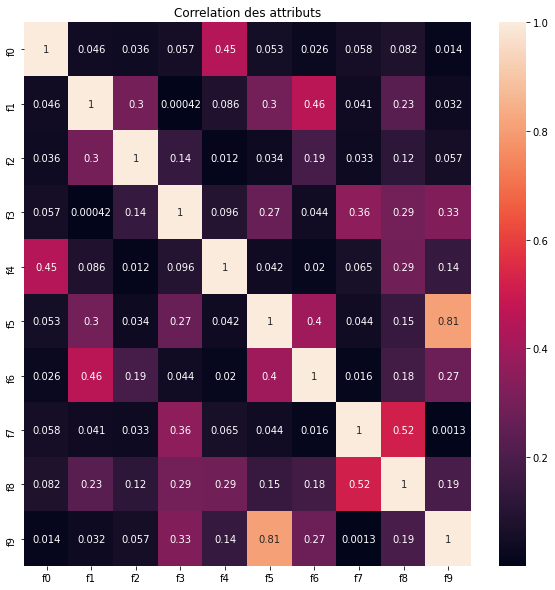

In [32]:
attributes_correlation = data_all.corr().abs()

plt.figure(figsize=(10, 10))
sns.heatmap(attributes_correlation, annot=True)
plt.title('Correlation des attributs')
plt.show()

# Entrainement des modeles

In [ ]:
!pip install scikit-learn

### Fonctions

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from math import sqrt

In [35]:
@ignore_warnings(category=ConvergenceWarning)
def test_model(model, data, target_attribute, n=10):
  """
  Tester un modele
  """
  X = data.loc[:, data.columns != target_attribute]   # data input
  y = data[target_attribute]                          # data target

  accuracy = []
  predictions = []

  for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)

    predictions.append(pred)
    accuracy.append(acc)

  return accuracy, predictions

In [36]:
@ignore_warnings(category=ConvergenceWarning)
def train_model(model, params, data, target_attribute):
  """
  Entrainer un modele
  """
  grid = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=3)

  x_train = data.loc[:, data.columns != target_attribute]
  y_train = data[target_attribute]

  grid.fit(x_train, y_train)

  best_params = grid.best_params_
  best_model = grid.best_estimator_

  return best_params, best_model

In [37]:
def acc_statistic(accuracies):
  """
  Génère les stats de plusieur précision
  """
  mean_val = sum(accuracies) / len(accuracies)
  min_val = min(accuracies)
  max_val = max(accuracies)

  return mean_val, min_val, max_val

In [38]:
def analyse_result_with_plot(x, y1, y2, y3, x_label, y_label, title, figsize=(12, 6)):
  plt.figure(figsize=figsize)
  plt.plot(x, y1, linestyle='dashed', marker='o', label='précision moy.')
  plt.plot(x, y2, linestyle='dashed', marker='o', label='précision min.')
  plt.plot(x, y3, linestyle='dashed', marker='o', label='précision max.')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()
  plt.grid(b=True, which='major', color='#bdc3c7', linestyle='--')
  plt.show()

In [39]:
def analyse_result_with_bar(x, y1, y2, y3, x_label, y_label, title, figsize=(12, 6)):
  x_values = np.arange(len(x)) 
  barWidth = 0.15

  plt.figure(figsize=(12,6))
  plt.bar(x_values, y1, width=barWidth, label='precision moy.')
  plt.bar(x_values - barWidth, y2, width=barWidth, label='precision min.')
  plt.bar(x_values + barWidth, y3, width=barWidth, label='precision max.')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks([r for r in range(len(y1))], x)
  plt.legend()
  plt.title(title)
  plt.show()

## K-NN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model = KNeighborsClassifier()

### Test du modele par defaut

In [42]:
knn_accuracy, knn_predictions = test_model(knn_model, data_tr, target_attribute)

In [43]:
knn_accuracy_mean, knn_accuracy_min, knn_accuracy_max = acc_statistic(knn_accuracy)

print(f'Precision\t', 
      f'moy.: {round(knn_accuracy_mean, 8)}\t',
      f'min.: {round(knn_accuracy_min, 8)}\t',
      f'max.: {round(knn_accuracy_max, 8)}\t')

Precision	 moy.: 0.71775307	 min.: 0.71242331	 max.: 0.73121166	


### Recherche des meilleurs parametres

In [44]:
from math import sqrt

#### Influence de `k` (nombre de voisins)

In [45]:
knn_min_k = 1
knn_max_k = int(sqrt(len(data_tr)))

In [46]:
knn_k_result = []

for k in range(knn_min_k, knn_max_k):
  model = KNeighborsClassifier(n_neighbors=k)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  knn_k_result.append((k, accuracy))

In [47]:
knn_k_values = [i for i in range(knn_min_k, knn_max_k)]
knn_k_acc_stats = [acc_statistic(accuracy) for _, accuracy in knn_k_result]
knn_k_mean_accuracy = [mean_acc for mean_acc, _, _ in knn_k_acc_stats]
knn_k_min_accuracy = [min_acc for _, min_acc, _ in knn_k_acc_stats]
knn_k_max_accuracy = [max_acc for _, _, max_acc in knn_k_acc_stats]

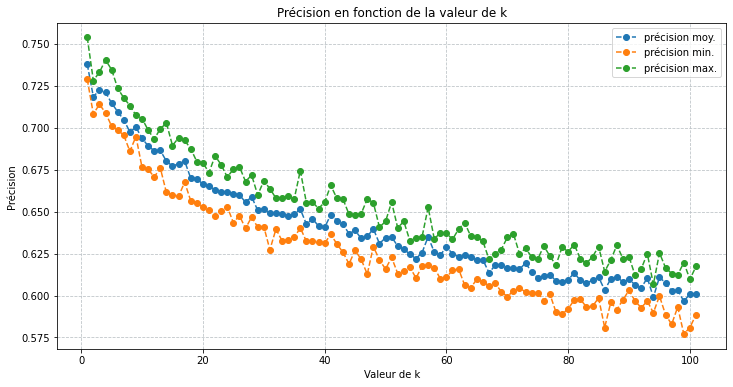

In [48]:
analyse_result_with_plot(knn_k_values, 
                         knn_k_mean_accuracy, 
                         knn_k_min_accuracy, 
                         knn_k_max_accuracy, 
                         'Valeur de k',
                         'Précision',
                         'Précision en fonction de la valeur de k')

On remarque qu'avec des valeur de k entre 0 et 8 on obtiens les meilleures précision

In [49]:
knn_max_k = 9

#### Influence de `weights`

In [50]:
knn_weights_type = ['uniform', 'distance']

In [51]:
knn_weights_result = []

for weights in knn_weights_type:
  model = KNeighborsClassifier(weights=weights)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  knn_weights_result.append((k, accuracy))

In [52]:
knn_weights_values = knn_weights_type[:]
knn_weights_acc_stats = [acc_statistic(accuracy) for _, accuracy in knn_weights_result]
knn_weights_mean_accuracy = [mean_acc for mean_acc, _, _ in knn_weights_acc_stats]
knn_weights_min_accuracy = [min_acc for _, min_acc, _ in knn_weights_acc_stats]
knn_weights_max_accuracy = [max_acc for _, _, max_acc in knn_weights_acc_stats]

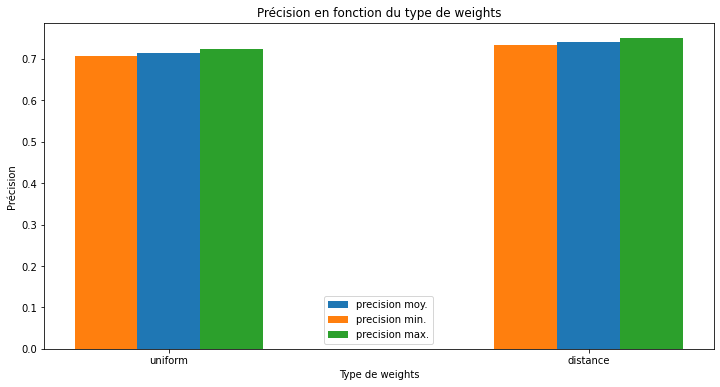

In [53]:
analyse_result_with_bar(knn_weights_values,
                        knn_weights_mean_accuracy, 
                        knn_weights_min_accuracy, 
                        knn_weights_max_accuracy, 
                        'Type de weights',
                        'Précision',
                        'Précision en fonction du type de weights')

In [54]:
knn_weights_type = ['distance']

#### Influence de `p`

In [55]:
knn_min_p = 1
knn_max_p = 10

In [56]:
knn_p_result = []

for p in range(knn_min_p, knn_max_p):
  model = KNeighborsClassifier(p=p)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  knn_p_result.append((p, accuracy))

In [57]:
knn_p_values = [p for p in range(knn_min_p, knn_max_p)]
knn_p_acc_stats = [acc_statistic(accuracy) for _, accuracy in knn_p_result]
knn_p_mean_accuracy = [mean_acc for mean_acc, _, _ in knn_p_acc_stats]
knn_p_min_accuracy = [min_acc for _, min_acc, _ in knn_p_acc_stats]
knn_p_max_accuracy = [max_acc for _, _, max_acc in knn_p_acc_stats]

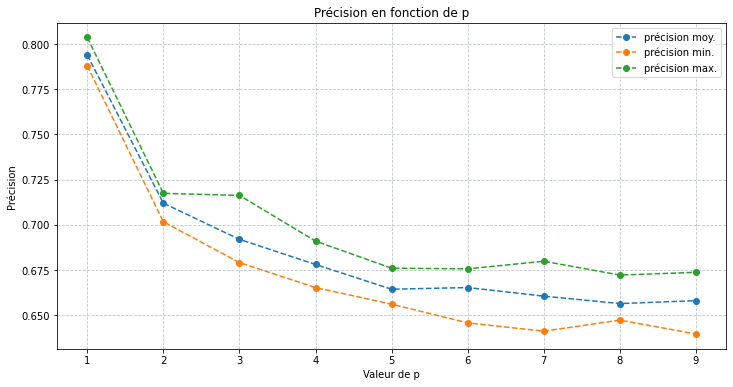

In [58]:
analyse_result_with_plot(knn_p_values,
                         knn_p_mean_accuracy,
                         knn_p_min_accuracy,
                         knn_p_max_accuracy,
                         'Valeur de p',
                         'Précision',
                         'Précision en fonction de p')

In [59]:
knn_max_p = 3

### Recherche du meilleur modele

In [60]:
knn_parameters = {
    'n_neighbors': [k for k in range(knn_min_k, knn_max_k)], 
    'weights': knn_weights_type, 
    'p': [p for p in range(knn_min_p, knn_max_p)]
}

knn_best_param, knn_best_model = train_model(knn_model, knn_parameters, data_tr, target_attribute)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   13.5s finished


In [61]:
print("Meilleure parametres pour knn :")
print(knn_best_param)

Meilleure parametres pour knn :
{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [62]:
knn_model = knn_best_model

### Comparaison

In [63]:
knn_accuracy_mean_old, knn_accuracy_min_old, knn_accuracy_max_old = knn_accuracy_mean, knn_accuracy_min, knn_accuracy_max

In [64]:
knn_accuracy, knn_predictions = test_model(knn_model, data_tr, target_attribute)

In [65]:
knn_accuracy_mean, knn_accuracy_min, knn_accuracy_max = acc_statistic(knn_accuracy)

print(f'Ancienne precision\t', 
      f'moy.: {round(knn_accuracy_mean_old, 8)}\t',
      f'min.: {round(knn_accuracy_min_old, 8)}\t',
      f'max.: {round(knn_accuracy_max_old, 8)}\t')

print(f'Nouvelle precision\t', 
      f'moy.: {round(knn_accuracy_mean, 8)}\t',
      f'min.: {round(knn_accuracy_min, 8)}\t',
      f'max.: {round(knn_accuracy_max, 8)}\t')

Ancienne precision	 moy.: 0.71775307	 min.: 0.71242331	 max.: 0.73121166	
Nouvelle precision	 moy.: 0.8205138	 min.: 0.81288344	 max.: 0.82937117	


## Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr_model = LogisticRegression(multi_class='multinomial')

### Test du modele par defaut

In [68]:
lr_accuracy, lr_predictions = test_model(lr_model, data_tr, target_attribute)

In [69]:
lr_accuracy_mean, lr_accuracy_min, lr_accuracy_max = acc_statistic(lr_accuracy)

print(f'Precision\t', 
      f'moy.: {round(lr_accuracy_mean, 8)}\t',
      f'min.: {round(lr_accuracy_min, 8)}\t',
      f'max.: {round(lr_accuracy_max, 8)}\t')

Precision	 moy.: 0.56019939	 min.: 0.53220859	 max.: 0.57592025	


### Recherche des meilleurs parametres

#### Influence de `max_iter`

In [70]:
lr_max_iter_range = [i for i in range(100, 1000, 100)]

In [71]:
lr_max_iter_result = []

for max_iter in lr_max_iter_range:
  model = LogisticRegression(multi_class='multinomial', max_iter=max_iter)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  lr_max_iter_result.append((k, accuracy))

In [72]:
lr_max_iter_values = lr_max_iter_range[:]
lr_max_iter_acc_stats = [acc_statistic(accuracy) for _, accuracy in lr_max_iter_result]
lr_max_iter_mean_accuracy = [mean_acc for mean_acc, _, _ in lr_max_iter_acc_stats]
lr_max_iter_min_accuracy = [min_acc for _, min_acc, _ in lr_max_iter_acc_stats]
lr_max_iter_max_accuracy = [max_acc for _, _, max_acc in lr_max_iter_acc_stats]

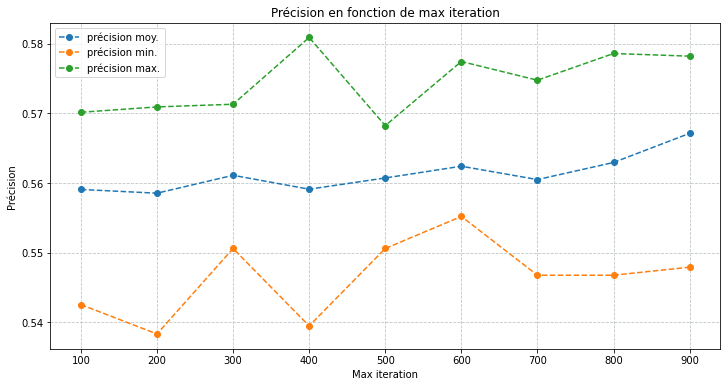

In [73]:
analyse_result_with_plot(lr_max_iter_values, 
                         lr_max_iter_mean_accuracy, 
                         lr_max_iter_min_accuracy, 
                         lr_max_iter_max_accuracy, 
                         'Max iteration',
                         'Précision',
                         'Précision en fonction de max iteration')

In [74]:
lr_max_iter_range = [i for i in range(100, 600, 100)]

#### Influence de `c`

In [75]:
lr_c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [76]:
lr_c_result = []

for c in lr_c_range:
  model = LogisticRegression(multi_class='multinomial')
  accuracy, _ = test_model(model, data_tr, target_attribute)

  lr_c_result.append((k, accuracy))

In [77]:
lr_c_values = lr_c_range[:]
lr_c_acc_stats = [acc_statistic(accuracy) for _, accuracy in lr_c_result]
lr_c_mean_accuracy = [mean_acc for mean_acc, _, _ in lr_c_acc_stats]
lr_c_min_accuracy = [min_acc for _, min_acc, _ in lr_c_acc_stats]
lr_c_max_accuracy = [max_acc for _, _, max_acc in lr_c_acc_stats]

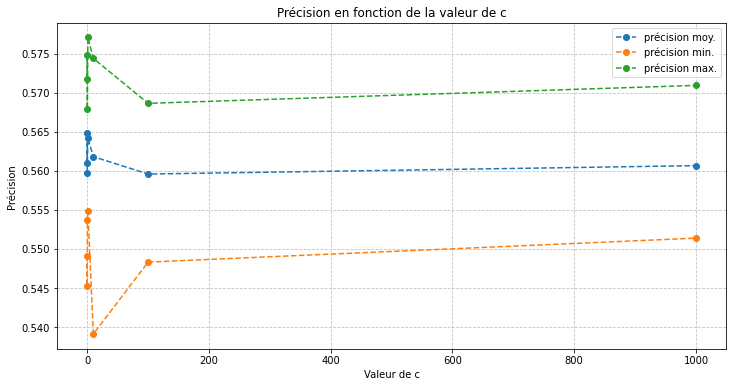

In [78]:
analyse_result_with_plot(lr_c_values, 
                         lr_c_mean_accuracy, 
                         lr_c_min_accuracy, 
                         lr_c_max_accuracy, 
                         'Valeur de c',
                         'Précision',
                         'Précision en fonction de la valeur de c')

In [79]:
lr_c_range = [1, 10, 100]

#### Influence de `solver`

In [80]:
lr_solver_type = ['newton-cg', 'sag', 'saga', 'lbfgs']

In [81]:
lr_solver_result = []

for solver in lr_solver_type:
  model = LogisticRegression(multi_class='multinomial', solver=solver)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  lr_solver_result.append((solver, accuracy))

In [82]:
lr_solver_values = lr_solver_type[:]
lr_solver_acc_stats = [acc_statistic(accuracy) for _, accuracy in lr_solver_result]
lr_solver_mean_accuracy = [mean_acc for mean_acc, _, _ in lr_solver_acc_stats]
lr_solver_min_accuracy = [min_acc for _, min_acc, _ in lr_solver_acc_stats]
lr_solver_max_accuracy = [max_acc for _, _, max_acc in lr_solver_acc_stats]

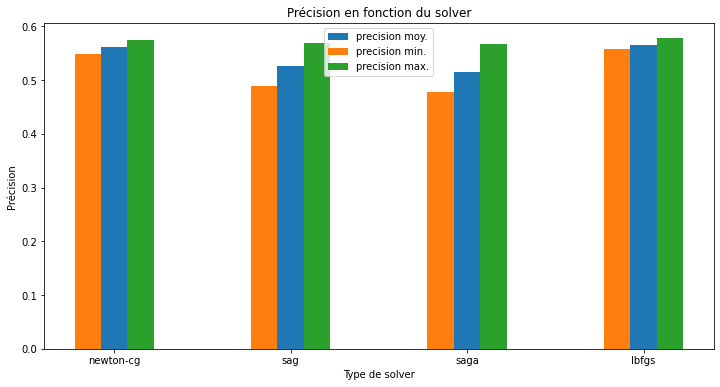

In [83]:
analyse_result_with_bar(lr_solver_values,
                        lr_solver_mean_accuracy, 
                        lr_solver_min_accuracy, 
                        lr_solver_max_accuracy, 
                        'Type de solver',
                        'Précision',
                        'Précision en fonction du solver')

In [84]:
lr_solver_type = ['newton-cg', 'sag', 'saga', 'lbfgs']

### Recherche du meilleur modele

In [85]:
lr_parameters = {
    'max_iter': lr_max_iter_range, 
    'C': lr_c_range, 
    'solver': lr_solver_type
}

lr_best_param, lr_best_model = train_model(lr_model, lr_parameters, data_tr, target_attribute)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.4min finished


In [86]:
print("Meilleure parametres pour knn :")
print(lr_best_param)

Meilleure parametres pour knn :
{'C': 10, 'max_iter': 400, 'solver': 'lbfgs'}


In [87]:
lr_model = lr_best_model

### Comparaison

In [88]:
lr_accuracy_mean_old, lr_accuracy_min_old, lr_accuracy_max_old = lr_accuracy_mean, lr_accuracy_min, lr_accuracy_max

In [89]:
lr_accuracy, lr_predictions = test_model(lr_model, data_tr, target_attribute)

In [90]:
lr_accuracy_mean, lr_accuracy_min, lr_accuracy_max = acc_statistic(lr_accuracy)

print(f'Ancienne precision\t', 
      f'moy.: {round(lr_accuracy_mean_old, 8)}\t',
      f'min.: {round(lr_accuracy_min_old, 8)}\t',
      f'max.: {round(lr_accuracy_max_old, 8)}\t')

print(f'Nouvelle precision\t', 
      f'moy.: {round(lr_accuracy_mean, 8)}\t',
      f'min.: {round(lr_accuracy_min, 8)}\t',
      f'max.: {round(lr_accuracy_max, 8)}\t')

Ancienne precision	 moy.: 0.56019939	 min.: 0.53220859	 max.: 0.57592025	
Nouvelle precision	 moy.: 0.55751534	 min.: 0.53834356	 max.: 0.57400307	


## Support Vector Machine (SVM)

In [91]:
from sklearn.svm import SVC

In [92]:
svm_model = SVC()

### Test du modele par defaut

In [93]:
svm_accuracy, svm_predictions = test_model(svm_model, data_tr, target_attribute)

In [94]:
svm_accuracy_mean, svm_accuracy_min, svm_accuracy_max = acc_statistic(svm_accuracy)

print(f'Precision\t', 
      f'moy.: {round(svm_accuracy_mean, 8)}\t',
      f'min.: {round(svm_accuracy_min, 8)}\t',
      f'max.: {round(svm_accuracy_max, 8)}\t')

Precision	 moy.: 0.6646089	 min.: 0.64263804	 max.: 0.71203988	


### Recherche des meilleurs parametres

#### Influence du `kernel`

In [95]:
svm_kernel_type = ['rbf', 'sigmoid', 'linear']

In [96]:
svm_kernel_result = []

for kernel in svm_kernel_type:
  model = SVC(kernel=kernel)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  svm_kernel_result.append((kernel, accuracy))

In [97]:
svm_kernel_values = svm_kernel_type[:]
svm_kernel_acc_stats = [acc_statistic(accuracy) for _, accuracy in svm_kernel_result]
svm_kernel_mean_accuracy = [mean_acc for mean_acc, _, _ in svm_kernel_acc_stats]
svm_kernel_min_accuracy = [min_acc for _, min_acc, _ in svm_kernel_acc_stats]
svm_kernel_max_accuracy = [max_acc for _, _, max_acc in svm_kernel_acc_stats]

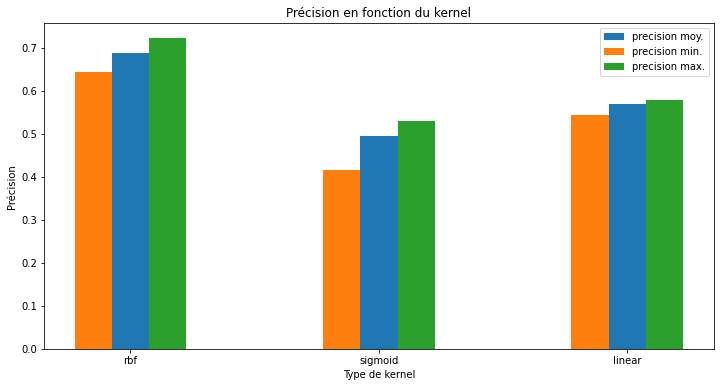

In [98]:
analyse_result_with_bar(svm_kernel_values,
                        svm_kernel_mean_accuracy, 
                        svm_kernel_min_accuracy, 
                        svm_kernel_max_accuracy, 
                        'Type de kernel',
                        'Précision',
                        'Précision en fonction du kernel')

In [99]:
svm_kernel_type = ['rbf']

#### Influence du `gamma`

In [100]:
svm_gamma_range = [1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2]

In [101]:
svm_gamma_result = []

for gamma in svm_gamma_range:
  model = SVC(gamma=gamma)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  svm_gamma_result.append((gamma, accuracy))

In [102]:
svm_gamma_values = svm_gamma_range[:]
svm_gamma_acc_stats = [acc_statistic(accuracy) for _, accuracy in svm_gamma_result]
svm_gamma_mean_accuracy = [mean_acc for mean_acc, _, _ in svm_gamma_acc_stats]
svm_gamma_min_accuracy = [min_acc for _, min_acc, _ in svm_gamma_acc_stats]
svm_gamma_max_accuracy = [max_acc for _, _, max_acc in svm_gamma_acc_stats]

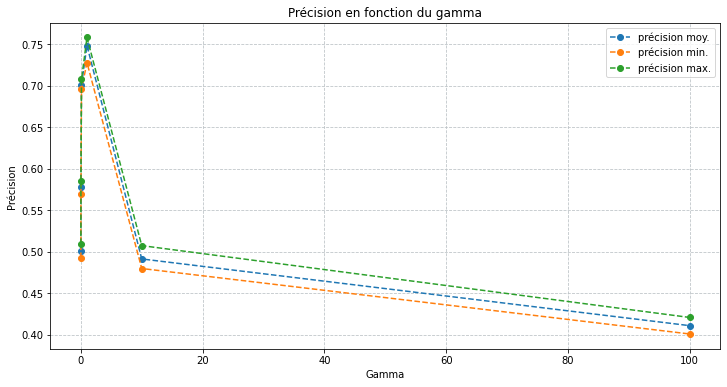

In [103]:
analyse_result_with_plot(svm_gamma_values, 
                         svm_gamma_mean_accuracy, 
                         svm_gamma_min_accuracy, 
                         svm_gamma_max_accuracy, 
                         'Gamma',
                         'Précision',
                         'Précision en fonction du gamma')

In [104]:
svm_gamma_range = [1e-1, 1]

#### Influence de `C`

In [105]:
svm_c_range = [1e-2, 1e-1, 1, 10, 25, 50, 100, 1000]

In [106]:
svm_c_result = []

for c in svm_c_range:
  model = SVC(C=c)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  svm_c_result.append((gamma, accuracy))

In [107]:
svm_c_values = svm_c_range[:]
svm_c_acc_stats = [acc_statistic(accuracy) for _, accuracy in svm_c_result]
svm_c_mean_accuracy = [mean_acc for mean_acc, _, _ in svm_c_acc_stats]
svm_c_min_accuracy = [min_acc for _, min_acc, _ in svm_c_acc_stats]
svm_c_max_accuracy = [max_acc for _, _, max_acc in svm_c_acc_stats]

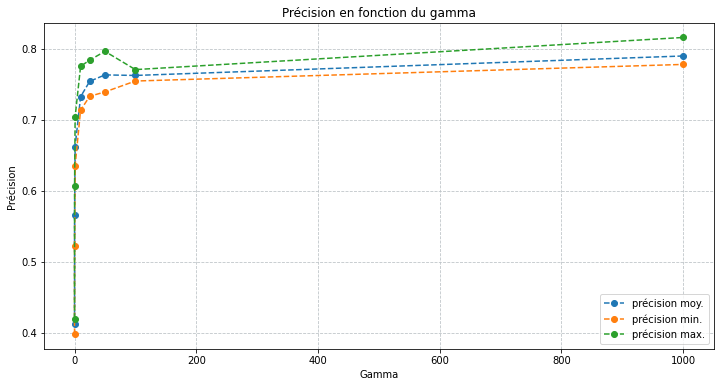

In [108]:
analyse_result_with_plot(svm_c_values, 
                         svm_c_mean_accuracy, 
                         svm_c_min_accuracy, 
                         svm_c_max_accuracy, 
                         'Gamma',
                         'Précision',
                         'Précision en fonction du gamma')

In [109]:
svm_c_range = [10, 25, 50, 100]

### Recherche du meilleur modele

In [110]:
svm_parameters = {
    'kernel': svm_kernel_type, 
    'gamma': svm_gamma_range, 
    'C': svm_c_range
}

svm_best_param, svm_best_model = train_model(svm_model, svm_parameters, data_tr, target_attribute)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.0min finished


In [111]:
print("\nMeilleure parametres trouves :")
print(svm_best_param)


Meilleure parametres trouves :
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [112]:
svm_model = svm_best_model

### Comparaison

In [113]:
svm_accuracy_mean_old, svm_accuracy_min_old, svm_accuracy_max_old = svm_accuracy_mean, svm_accuracy_min, svm_accuracy_max

In [114]:
svm_accuracy, svm_predictions = test_model(svm_model, data_tr, target_attribute)

In [115]:
svm_accuracy_mean, svm_accuracy_min, svm_accuracy_max = acc_statistic(svm_accuracy)

print(f'Ancienne precision\t', 
      f'moy.: {round(svm_accuracy_mean_old, 8)}\t',
      f'min.: {round(svm_accuracy_min_old, 8)}\t',
      f'max.: {round(svm_accuracy_max_old, 8)}\t')

print(f'Nouvelle precision\t', 
      f'moy.: {round(svm_accuracy_mean, 8)}\t',
      f'min.: {round(svm_accuracy_min, 8)}\t',
      f'max.: {round(svm_accuracy_max, 8)}\t')

Ancienne precision	 moy.: 0.6646089	 min.: 0.64263804	 max.: 0.71203988	
Nouvelle precision	 moy.: 0.80345092	 min.: 0.79141104	 max.: 0.81058282	


## Random forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_model = RandomForestClassifier()

### Test du modele par defaut

In [118]:
rf_accuracy, rf_predictions = test_model(rf_model, data_tr, target_attribute)

In [119]:
rf_accuracy_mean, rf_accuracy_min, rf_accuracy_max = acc_statistic(rf_accuracy)

print(f'Precision\t', 
      f'moy.: {round(rf_accuracy_mean, 8)}\t',
      f'min.: {round(rf_accuracy_min, 8)}\t',
      f'max.: {round(rf_accuracy_max, 8)}\t')

Precision	 moy.: 0.97779908	 min.: 0.9720092	 max.: 0.9827454	


## Decision tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
dt_model = DecisionTreeClassifier()

### Test du model par defaut

In [122]:
dt_accuracy, dt_predictions = test_model(dt_model, data_tr, target_attribute)

In [123]:
dt_accuracy_mean, dt_accuracy_min, dt_accuracy_max = acc_statistic(dt_accuracy)

print(f'Precision\t', 
      f'moy.: {round(dt_accuracy_mean, 8)}\t',
      f'min.: {round(dt_accuracy_min, 8)}\t',
      f'max.: {round(dt_accuracy_max, 8)}\t')

Precision	 moy.: 0.95130368	 min.: 0.92868098	 max.: 0.96740798	


## Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
nb_model = GaussianNB()

### Test du model par defaut

In [126]:
nb_accuracy, nb_predictions = test_model(nb_model, data_tr, target_attribute)

In [127]:
nb_accuracy_mean, nb_accuracy_min, nb_accuracy_max = acc_statistic(nb_accuracy)

print(f'Precision\t', 
      f'moy.: {round(nb_accuracy_mean, 8)}\t',
      f'min.: {round(nb_accuracy_min, 8)}\t',
      f'max.: {round(nb_accuracy_max, 8)}\t')

Precision	 moy.: 0.29332822	 min.: 0.28259202	 max.: 0.3232362	


### Recherche de meilleurs parametres

#### Influence de `var_smoothing`

In [128]:
nb_smoothing_range = list(np.logspace(0, -9, 10))

In [129]:
nb_smoothing_result = []

for smooth_val in nb_smoothing_range:
  model = GaussianNB(var_smoothing=smooth_val)
  accuracy, _ = test_model(model, data_tr, target_attribute)

  nb_smoothing_result.append((smooth_val, accuracy))

In [130]:
nb_smoothing_values = nb_smoothing_range[:]
nb_smoothing_acc_stats = [acc_statistic(accuracy) for _, accuracy in nb_smoothing_result]
nb_smoothing_mean_accuracy = [mean_acc for mean_acc, _, _ in nb_smoothing_acc_stats]
nb_smoothing_min_accuracy = [min_acc for _, min_acc, _ in nb_smoothing_acc_stats]
nb_smoothing_max_accuracy = [max_acc for _, _, max_acc in nb_smoothing_acc_stats]

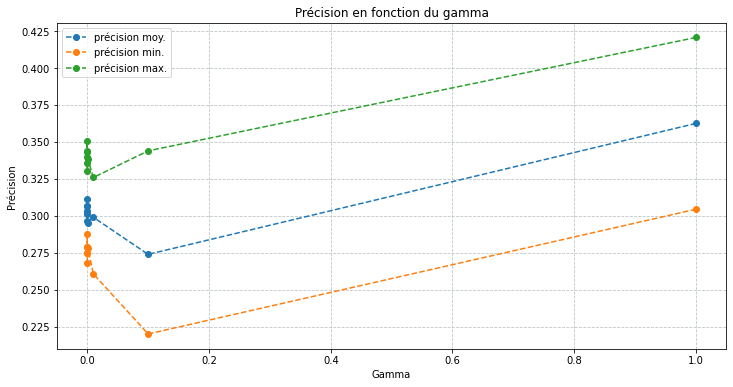

In [131]:
analyse_result_with_plot(nb_smoothing_values, 
                         nb_smoothing_mean_accuracy, 
                         nb_smoothing_min_accuracy, 
                         nb_smoothing_max_accuracy, 
                         'Gamma',
                         'Précision',
                         'Précision en fonction du gamma')

### Recherche du meilleur modele

In [132]:
nb_parameters = {
    'var_smoothing': nb_smoothing_range
}

nb_best_param, nb_best_model = train_model(nb_model, nb_parameters, data_tr, target_attribute)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [133]:
print("\nMeilleure parametres trouves :")
print(nb_best_param)


Meilleure parametres trouves :
{'var_smoothing': 1.0}


In [134]:
nb_model = nb_best_model

### Comparaison

In [135]:
nb_accuracy_mean_old, nb_accuracy_min_old, nb_accuracy_max_old = nb_accuracy_mean, nb_accuracy_min, nb_accuracy_max

In [136]:
nb_accuracy, nb_predictions = test_model(nb_model, data_tr, target_attribute)

In [137]:
nb_accuracy_mean, nb_accuracy_min, nb_accuracy_max = acc_statistic(nb_accuracy)

print(f'Ancienne precision\t', 
      f'moy.: {round(nb_accuracy_mean_old, 8)}\t',
      f'min.: {round(nb_accuracy_min_old, 8)}\t',
      f'max.: {round(nb_accuracy_max_old, 8)}\t')

print(f'Nouvelle precision\t', 
      f'moy.: {round(nb_accuracy_mean, 8)}\t',
      f'min.: {round(nb_accuracy_min, 8)}\t',
      f'max.: {round(nb_accuracy_max, 8)}\t')

Ancienne precision	 moy.: 0.29332822	 min.: 0.28259202	 max.: 0.3232362	
Nouvelle precision	 moy.: 0.35855061	 min.: 0.24616564	 max.: 0.4202454	


# Evaluation des modeles

## Enumération des modeles

In [138]:
model_enum = {
    'knn' : (knn_model, 'K-NN'),
    'lr'  : (lr_model, 'Logstic Regression'),
    'svm' : (svm_model, 'SVM'),
    'rf'  : (rf_model, 'Random Forest'),
    'dt'  : (dt_model, 'Decision Tree'),
    'nb'  : (nb_model, 'Naive Bayes')
}

## Test des modeles

In [139]:
@ignore_warnings(category=ConvergenceWarning)
def test(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, predictions)

  return accuracy, predictions

In [140]:
model_result = {}

X_train = data_tr.loc[:, data_tr.columns != target_attribute]
y_train = data_tr[target_attribute]

X_test = data_ts.loc[:, data_ts.columns != target_attribute]
y_test = data_ts[target_attribute]

for model_name in model_enum:
  model, _ = model_enum.get(model_name)

  accuracy, predictions = test(model, X_train, X_test, y_train, y_test)

  model_result[model_name] = accuracy

## Récupération du meilleure modele

In [141]:
best_result = None

for key in model_result.keys():
  accuracy = model_result[key]

  _, model_name = model_enum.get(key)

  if best_result is None:
    best_result = (key, model_name, accuracy)
  else:
    if best_result[2] < accuracy:
      best_result = (key, model_name, accuracy)

  name = model_name.ljust(18, ' ')

  print(f'{key}\t', f'{name}\t', f'précision : {round(accuracy, 6)}')

knn	 K-NN              	 précision : 0.850436
lr	 Logstic Regression	 précision : 0.561272
svm	 SVM               	 précision : 0.815752
rf	 Random Forest     	 précision : 0.981125
dt	 Decision Tree     	 précision : 0.970298
nb	 Naive Bayes       	 précision : 0.331034


In [142]:
best_model_name = best_result[1]

print(f'Meilleur model: {best_model_name}')

best_model, _ = model_enum.get(best_result[0])

Meilleur model: Random Forest


# Enregistrement

In [143]:
import joblib

In [144]:
model_filename = 'model.sav'

joblib.dump(best_model, model_filename)

['model.sav']

# Chargement

In [145]:
loaded_model = joblib.load(model_filename)

In [146]:
# resultat attendu : A
x = [[0.31545, -0.236281, 0.37077, 0.812174, 0.261718, 0.14879, 0.408929, 0.690469, -0.123005, 0.029367]]

prediction = loaded_model.predict(x)[0]
print(f'Classe prédit: {prediction}')

Classe prédit: A
